<h1>Исследование бизнес-показателей приложения Procrastinate Pro+.
        Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Необходимо изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

# Обзор и предобработка данных

## Обзор данных

Составим первое представление о данных.

Импортируем `pandas` и другие необходимые библиотеки.

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Прочитаем файл `visits_info_short.csv` и сохраним его в переменной `visits`:

In [2]:
# чтение файла с визитами и сохранение в visits
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')

Выведем на экран первые пять строк таблицы:

In [3]:
# получение первых 5 строк таблицы visits
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Получим общую информацию о таблице:

In [4]:
# получение общей информации о данных в таблице visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 6 столбцов: 

* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

В названиях колонок есть два типа нарушений стиля:

* наличие пробелов в `User Id`, `Session Start` и в `Session End`,
* верхний регистр во всех названиях столбцов.

В одном столбце — целочисленные числовые данные, в пяти столбцах — данные типа object. 

Тип данных в столбцах `Session Start` и `Session End` необходимо привести к типу `datetime64`.

Прочитаем файл `orders_info_short.csv` и сохраним его в переменной `orders`:

In [5]:
# чтение файла с заказами и сохранение в orders
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')

Выведем на экран первые пять строк таблицы:

In [6]:
# получение первых 5 строк таблицы orders
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Получим общую информацию о таблице:

In [7]:
# получение общей информации о данных в таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 3 столбца: 

* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

В названиях колонок есть два типа нарушений стиля:

* наличие пробелов в `User Id`, `Event Dt`,
* верхний регистр во всех названиях столбцов.

В столбце `User Id` — целочисленные числовые данные, в столбце `Revenue` — вещественные числовые данные, в столбце `Event Dt` — данные типа object. 

Тип данных в столбце `Event Dt` необходимо привести к типу `datetime64`.

Прочитаем файл `costs_info_short.csv`, сохраним его в переменной costs:

In [8]:
# чтение файла с расходами на рекламу и сохранение в costs
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

Далее проделаем действия, аналогичные предыдущим файлам:

In [9]:
# получение первых 5 строк таблицы costs
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Получим общую информацию о таблице:

In [10]:
# получение общей информации о данных в таблице costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 3 столбца:

* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

В названиях колонок есть одно нарушение стиля:

* верхний регистр в названии столбца `Channel`.

В столбцах `dt` и `Channel` — данные типа object, а в столбце `costs` — вещественные числовые данные. 

Тип данных в столбце `dt` необходимо привести к типу `datetime64`.

Теперь оценим числовые переменные в таблицах `orders` и `costs` на предмет наличия аномальных значений.

In [11]:
# оценка числовых переменных таблицы orders
orders.describe()

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Мы видим, что в большинстве строк значение `revenue` равно 4.99. Однако в некоторых случаях оно составляет 49.99. Попробуем понять, не связано ли это с какой-либо ошибкой. Для этого выведем на экран 15 строк с этим значением.

In [12]:
# выведение на экран строк таблицы orders со значением `Revenue` = 49.99
orders.sort_values(by='Revenue', ascending = False).head(15)

,User Id,Event Dt,Revenue
13448,642375035115,2019-08-20 20:45:52,49.99
33770,185750501812,2019-08-22 16:24:00,49.99
16156,607666662521,2019-09-04 19:56:23,49.99
31627,649616333931,2019-07-24 19:44:44,49.99
28408,905723035964,2019-05-20 05:12:57,49.99
21019,827425147628,2019-09-29 00:03:28,49.99
35681,63074294855,2019-09-15 07:54:13,49.99
12317,398911918921,2019-08-13 03:39:36,49.99
8882,864658817301,2019-07-22 11:25:00,49.99
8046,150492038752,2019-07-16 06:10:34,49.99


Никакой системы нет. Скорее всего, цифры верные. Но на всякий случай обсудим это с менеджером продукта.

In [13]:
# оценка числовых переменных таблицы costs
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Все значения выше нуля. Есть аномально высокое значение в 630. Выведем на экран также 15 строк с максимальными расходами на рекламную кампанию.

In [14]:
# выведение на экран 15 строк таблицы costs с максимальными расходами на рекламные кампании
costs.sort_values(by='costs', ascending = False).head(15)

,dt,Channel,costs
695,2019-10-03,TipTop,630.0
690,2019-09-28,TipTop,623.0
684,2019-09-22,TipTop,616.0
691,2019-09-29,TipTop,605.5
689,2019-09-27,TipTop,602.0
719,2019-10-27,TipTop,588.0
685,2019-09-23,TipTop,570.5
698,2019-10-06,TipTop,563.5
718,2019-10-26,TipTop,563.5
686,2019-09-24,TipTop,556.5


Похоже на правду.

## Изменение названия столбцов и типов данных

Приведём названия столбцов к красивому стилю.

In [15]:
# приведем названия столбцов к нижнему регистру
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)

In [16]:
# переименуем столбцы
visits = visits.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end': 'session_end'})
orders = orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'})

In [17]:
# изменим тип данных на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим полученные таблицы.

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Все изменения прошли успешно.

Проверим, не выходят ли временные данные за пределы заданного интервала исследования - с 1 мая по 27 октября 2019 года.

Можно это сделать, например, сортировкой.

In [21]:
sorted(costs['dt'].unique())

[numpy.datetime64('2019-05-01T00:00:00.000000000'),
 numpy.datetime64('2019-05-02T00:00:00.000000000'),
 numpy.datetime64('2019-05-03T00:00:00.000000000'),
 numpy.datetime64('2019-05-04T00:00:00.000000000'),
 numpy.datetime64('2019-05-05T00:00:00.000000000'),
 numpy.datetime64('2019-05-06T00:00:00.000000000'),
 numpy.datetime64('2019-05-07T00:00:00.000000000'),
 numpy.datetime64('2019-05-08T00:00:00.000000000'),
 numpy.datetime64('2019-05-09T00:00:00.000000000'),
 numpy.datetime64('2019-05-10T00:00:00.000000000'),
 numpy.datetime64('2019-05-11T00:00:00.000000000'),
 numpy.datetime64('2019-05-12T00:00:00.000000000'),
 numpy.datetime64('2019-05-13T00:00:00.000000000'),
 numpy.datetime64('2019-05-14T00:00:00.000000000'),
 numpy.datetime64('2019-05-15T00:00:00.000000000'),
 numpy.datetime64('2019-05-16T00:00:00.000000000'),
 numpy.datetime64('2019-05-17T00:00:00.000000000'),
 numpy.datetime64('2019-05-18T00:00:00.000000000'),
 numpy.datetime64('2019-05-19T00:00:00.000000000'),
 numpy.datet

Можно через условия:

In [22]:
print(orders[orders['event_dt'] < '2019-05-01'])

Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []


In [23]:
print(orders[orders['event_dt'] >= '2019-10-28'])

            user_id            event_dt  revenue
27235  168016930663 2019-10-28 18:26:42     4.99
27236  902500481421 2019-10-28 17:19:00     4.99
27237  655520338703 2019-10-28 07:15:16     4.99
27238  557556117257 2019-10-28 00:36:17     4.99
27239   28791631319 2019-10-28 14:50:59     4.99
...             ...                 ...      ...
40207  651604369137 2019-10-31 16:19:07     4.99
40208  275341387049 2019-10-31 01:17:17     4.99
40209  374656616484 2019-10-31 06:17:29     4.99
40210  168548862926 2019-10-31 22:46:19     4.99
40211  329994900775 2019-10-31 13:29:06     4.99

[1087 rows x 3 columns]


In [24]:
print(visits[visits['session_start'] < '2019-05-01'])

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []


In [25]:
print(visits[visits['session_start'] >= '2019-10-28'])

             user_id         region   device         channel  \
204833  434198630691  United States   iPhone         organic   
204834  653462760786  United States      Mac    MediaTornado   
204835  896941673419  United States  Android         organic   
204836  168016930663  United States      Mac         organic   
204837  224709645908  United States   iPhone  RocketSuperAds   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

             session_start         session_end  
204833 2019-10-28 18:15:28 2019-10-28 18:25:44  
204834 2019-10-28 14:00:23 2019-10-28 14:15:48  
204835 2019-10-28 08:24:34 2019-10-28 09:43:09  
204836 2019-10-28 18:26:37 2019-10-

In [26]:
print(visits[visits['session_end'] < '2019-05-01'])

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []


In [27]:
print(visits[visits['session_end'] >= '2019-10-28'])

             user_id         region  device         channel  \
203359  795615180949  United States      PC        FaceBoom   
203376  602921501665  United States      PC         YRabbit   
203419  326578956261  United States     Mac          TipTop   
203425  537919581873  United States  iPhone  RocketSuperAds   
203487  693478447114  United States     Mac         organic   
...              ...            ...     ...             ...   
309896  329994900775             UK      PC         LeapBob   
309897  334903592310         France      PC  lambdaMediaAds   
309898  540102010126        Germany      PC         organic   
309899  308736936846        Germany     Mac         organic   
309900  109329042535        Germany      PC  lambdaMediaAds   

             session_start         session_end  
203359 2019-10-27 23:49:34 2019-10-28 00:10:28  
203376 2019-10-27 23:53:18 2019-10-28 00:55:33  
203419 2019-10-27 22:01:17 2019-10-28 00:01:45  
203425 2019-10-27 23:57:49 2019-10-28 00:36:25 

Как видим, часть данных в таблицах `visits` и `orders` выходят за пределы целевого диапазона (1 мая - 27 октября 2019 года) и включают весь октябрь 2019 года.

Однако в разделе 5 нам потребуются данные по 31 октября 2019 года включительно, поэтому удалять ничего не будем.

## Проверка данных на дубликаты

Проверим таблицы `visits` и `costs` на наличие дубликатов данных.

In [28]:
# подсчёт явных дубликатов
visits.duplicated().sum()

0

In [29]:
orders.duplicated().sum()

0

In [30]:
costs.duplicated().sum()

0

Итак, явных дубликатов не выявлено.

Проверим, есть ли неявные дубликаты. 

In [31]:
# поиск неявных дубликатов в столбце region таблицы `visits`
sorted(visits['region'].unique())

['France', 'Germany', 'UK', 'United States']

In [32]:
# поиск неявных дубликатов в столбце device таблицы `visits`
sorted(visits['device'].unique())

['Android', 'Mac', 'PC', 'iPhone']

In [33]:
# поиск неявных дубликатов в столбце channel таблицы `visits`
sorted(visits['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

In [34]:
# поиск неявных дубликатов в столбце channel таблицы `costs`
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

In [35]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Итак, неявных дубликатов также не выявлено. Каналы рекламных кампаний в таблицах `visits`, `costs` совпали.

Проверим данные на пропуски.

## Проверка данных на пропуски

Проверим таблицы `visits`, `orders` и `costs` на наличие пропусков в данных.

In [36]:
# подсчёт пропусков
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [37]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [38]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Пропусков в данных нет.

## Общий вывод

Мы загрузили и проверили полученные данные.

В большинстве таблиц не соблюдались правила красивого стиля к названиям столбцов, а также типы данных. Исправили.

Некоторые числовые значения вызывают сомнения, не аномальные ли они, но сделать однозначный вывод без профильных специалистов невозможно.
Дубликатов и пропусков нигде не обнаружено.

Таким образом, мы провели предобработку данных и можем приступать к следующему этапу.

# Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Зададим необходимые для исследования функции.

In [39]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    #profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['month'] = profiles['first_ts'].dt.strftime("%m-%y")

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [40]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [41]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [42]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [43]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [44]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [45]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [46]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 8))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Теперь перейдём непосредственно к исследованию.

# Иследовательский анализ данных

## Создание пользовательских профилей. Минимальная и максимальная дата привлечения пользователей.

Для создания пользовательских профилей вызовем функцию `get_profiles`:

In [47]:
# создание таблицы `profiles` и вывод на экран её первых пяти строк
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,05-19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,07-19,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10-19,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,08-19,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10-19,False,0.230769


In [48]:
p = profiles.merge(orders, on='user_id', how='left')
#print(p)
#result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
p.pivot_table(index='channel',values='revenue',aggfunc='sum')

,revenue
channel,
AdNonSense,3697.17
FaceBoom,25637.66
LeapBob,9560.13
MediaTornado,5752.32
OppleCreativeMedia,8365.53
RocketSuperAds,11598.32
TipTop,69574.76
WahooNetBanner,20006.63
YRabbit,6201.43


Теперь определим минимальную и максимальную дату.

In [49]:
# определение минимальной даты привлечения пользователей
min_date_acquisition = profiles['dt'].min()
print(min_date_acquisition)

2019-05-01


In [50]:
# определение максимальной даты привлечения пользователей
max_date_acquisition = profiles['dt'].max()
print(max_date_acquisition)

2019-10-27


Минимальная и максимальная даты совпали с границами нашего интервала.

Теперь проанализируем распределение пользователей по странам, устройствам и рекламным каналам.

## Анализ распределения пользователей по странам

Сперва выясним, из каких стран приходит больше всего пользователей, а затем - распределение платящих пользователей.

In [51]:
# распределение всех пользователей по странам в порядке убывания
profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


Как мы видим, больше всего пользователей приходится на США - более 100 тыс.чел. из 150 тыс.

Для того, чтобы получить распределение платящих пользователей, создадим таблицу по пользователям, которые совершили хотя бы одну оплату - `payer_profiles`

In [52]:
# создание таблицы платящих пользователей и вывод на экран первых 10 строк
payer_profiles = profiles[profiles['payer'] == True]
payer_profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,05-19,True,1.088172
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,06-19,True,1.008000
61,374052872,2019-08-08 15:42:57,TipTop,Mac,United States,2019-08-08,08-19,True,2.972222
71,414791703,2019-05-03 12:01:28,TipTop,iPhone,United States,2019-05-03,05-19,True,1.049180
124,785077127,2019-06-27 08:31:39,TipTop,Mac,United States,2019-06-27,06-19,True,2.539062
134,824773004,2019-10-24 00:24:33,organic,iPhone,UK,2019-10-24,10-19,True,0.000000
135,826930763,2019-10-26 06:09:54,LeapBob,PC,UK,2019-10-26,10-19,True,0.213134
141,866780690,2019-10-21 10:13:06,organic,Mac,United States,2019-10-21,10-19,True,0.000000
159,1053634008,2019-06-14 11:12:33,FaceBoom,Android,United States,2019-06-14,06-19,True,1.114966
164,1078806830,2019-10-11 13:08:52,TipTop,iPhone,United States,2019-10-11,10-19,True,3.715385


In [53]:
# распределение платящих пользователей по странам в порядке убывания
payer_profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


Отрыв лидера - США - стал ещё более заметен. На них приходят 6.9 тыс. платящих пользователей из общего числа в 8.9 тыс.чел.

Для наглядности построим таблицу, включающую количество пользователей и долю платящих по каждой стране.

In [54]:
# создание таблицы из региона и общего количества пользователей
region = (
         profiles.groupby('region')
         .agg({'user_id':'nunique'})
         .sort_values(by='user_id', ascending = False)
)

# добавление таблицы с количеством платящих пользователей
region = region.merge(
    payer_profiles.groupby('region').agg({'user_id':'nunique'}), on = 'region', how = 'left'
)

# создание столбца с долей платящих пользователей
region['Доля платящих в %'] = region['user_id_y'] / region['user_id_x'] * 100

# удаление столбца с количеством платящих пользователей
region = region.drop(columns='user_id_y')

# переименование столбцов и вывод на экран таблицы
region.rename(columns={'user_id_x': 'Количество пользователей'})

,Количество пользователей,Доля платящих в %
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


Итак, безоговорочный лидер как по общему количеству пользователей, так и по количеству и доле платящих пользователей - США. 

На них приходится 66.7% общего числа пользователей и 77.5% платящих пользователей. А конверсия в США на 67% выше, чем у следующей за ними Германии и составляет 6.9%.

Конверсия в европейских странах мало отличается друг от друга и колеблется от 4.1% (Германия) до 3.8% (Франция).

## Анализ распределения пользователей по устройствам

Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [55]:
# распределение пользователей по типам используемых устройств в порядке убывания
profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


Как мы видим, лидируют владельцы iPhone - их более 54 тыс.чел. из 150 тыс., а с владельцами Mac доля поклонников продуктов Apple превышает 56%.

Большинство пользователей предпочитает мобильные устройства - доля iPhone и Android составляет почти 60%.

In [56]:
# распределение платящих пользователей по устройствам в порядке убывания
payer_profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


Лидируют по-прежнему владельцы iPhone, поклонники Apple и мобильных устройств.

Построим таблицу, включающую количество пользователей и долю платящих для каждого устройства.

In [57]:
# создание таблицы из устройства и общего количества пользователей
device = (
         profiles.groupby('device')
         .agg({'user_id':'nunique'})
         .sort_values(by='user_id', ascending = False)
)

# добавление таблицы с количеством платящих пользователей
device = device.merge(
    payer_profiles.groupby('device').agg({'user_id':'nunique'}), on = 'device', how = 'left'
)

# создание столбца с долей платящих пользователей
device['Доля платящих в %'] = device['user_id_y'] / device['user_id_x'] * 100

# удаление столбца с количеством платящих пользователей
device = device.drop(columns='user_id_y')

# переименование столбцов и вывод на экран таблицы
device.rename(columns={'user_id_x': 'Количество пользователей'})

,Количество пользователей,Доля платящих в %
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


Итак, безоговорочный лидер как по общему количеству пользователей, так и по количеству платящих пользователей - iPhone. 

На них приходится 36.3% общего числа пользователей и 38% платящих пользователей. Однако по конверсии лидируют пользователи Mac c 6.4%, тогда как у пользователей iPhone - только 6.2%.

Самая низкая конверсия у пользователей PC - всего 5%. У пользователей Android конверсия близка к конверсии iPhone и составляет 5.9%.

## Анализ распределения пользователей по каналам привлечения

Изучим каналы привлечения и определим те каналы, из которых пришло больше всего платящих пользователей.

In [58]:
# распределение пользователей по каналам привлечения в порядке убывания
profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


Как мы видим, лидируют пришедшие без рекламы, из поисковых систем, - таких более 56 тыс. пользователей.

Далее следует рекламный канал `FaceBoom` - из него пришло 29 тыс. пользователей. Третий лидер - канал `TipTop` с почти 20 тыс. 
Остальные каналы привлекли менее 9 тыс. пользователей каждый.

In [59]:
# распределение платящих пользователей по каналам в порядке убывания
payer_profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


В тройке те же лидеры, но ситуация изменилась. Больше всего платящих клиентов (более 3.5 тыс.) привлёк канал `FaceBoom`, канал `TipTop` привлёк почти 1.9 тыс., а среди 56 тыс. бесплатных пользователей платящих всего 1.2 тыс.

Все другие каналы привлекли менее 500 платящих пользователей каждый.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [60]:
# создание таблицы из канала и общего количества пользователей
channel = (
         profiles.groupby('channel')
         .agg({'user_id':'nunique'})
         .sort_values(by='user_id', ascending = False)
)

# добавление таблицы с количеством платящих пользователей
channel = channel.merge(
    payer_profiles.groupby('channel').agg({'user_id':'nunique'}), on = 'channel', how = 'left'
)

# создание столбца с долей платящих пользователей
channel['Доля платящих в %'] = channel['user_id_y'] / channel['user_id_x'] * 100

# удаление столбца с количеством платящих пользователей
channel = channel.drop(columns='user_id_y')

# переименование столбцов и вывод на экран таблицы
channel.rename(columns={'user_id_x': 'Количество пользователей'})

,Количество пользователей,Доля платящих в %
channel,,
organic,56439,2.055316
FaceBoom,29144,12.204914
TipTop,19561,9.600736
OppleCreativeMedia,8605,2.707728
LeapBob,8553,3.063253
WahooNetBanner,8553,5.296387
RocketSuperAds,4448,7.913669
MediaTornado,4364,3.574702
YRabbit,4312,3.826531


Итак, лидер по количеству привлечённых пользователей - органическая выдача поисковых систем - характеризуется конверсией всего в 2.1%. Самая высокая конверсия у канала `FaceBoom` - 12.2%. У канала `TipTop` конверсия 9.6%.

Следует отметить высокую конверсию у каналов `AdNonSense` и `lambdaMediaAds` - у каждого она выше 10%.

Низкая конверсия, близкая к уровню органической выдачи, - у каналов `OppleCreativeMedia` и `LeapBob`.

## Общий вывод

Безоговорочный лидер как по общему количеству пользователей, так и по количеству и доле платящих пользователей - США.

На них приходится 66.7% общего числа пользователей и 77.5% платящих пользователей. А конверсия в США на 67% выше, чем у следующей за ними Германии и составляет 6.9%.

Конверсия в европейских странах мало отличается друг от друга и колеблется от 4.1% (Германия) до 3.8% (Франция).

Среди устройств на первом месте - iPhone. На них приходится 36.3% общего числа пользователей и 38% платящих пользователей. Однако по конверсии лидируют пользователи Mac c 6.4%, тогда как у пользователей iPhone - только 6.2%.

Самая низкая конверсия у пользователей PC - всего 5%. У пользователей Android конверсия близка к конверсии iPhone и составляет 5.9%

Среди каналов привлечения на первом месте - органическая выдача поисковых систем. На неё приходится более 56 тыс. чел. (37 процентов общего числа пользователей).

На втором месте `FaceBoom` - из него пришло 29 тыс. пользователей, третий лидер - канал `TipTop` с почти 20 тыс. 
Остальные каналы привлекли менее 9 тыс. пользователей каждый.

Тройка лидеров по количеству платящих пользователей та же, однако из 56 тыс. бесплатных пользователей покупки совершили только 1.2 тыс. из них. В результате этот канал на третьем месте после `FaceBoom` и `TipTop`.

В результате лидер по количеству привлечённых пользователей - органическая выдача поисковых систем - характеризуется конверсией всего в 2.1%. Самая высокая конверсия у канала FaceBoom - 12.2%. У канала TipTop конверсия 9.6%.

Следует отметить высокую конверсию у каналов AdNonSense и lambdaMediaAds - у каждого она выше 10%.

Низкая конверсия, близкая к уровню органической выдачи, - у каналов OppleCreativeMedia и LeapBob.

Перейдём теперь к анализу маркетинговых расходов.

# Анализ маркетинговых расходов

## Общая сумма расходов на маркетинг. Распределение расходов по рекламным каналам.

Посчитаем общую сумму расходов на маркетинг и их распределение по странам.

In [61]:
# определение общей суммы расходов на маркетинг
total_cost = costs['costs'].sum()
print(total_cost)

105497.30000000002


In [62]:
# распределение расходов на маркетинг по странам
profiles.groupby('region').sum()

,user_id,payer,acquisition_cost
region,,,
France,8721079260394761,663,5075.973946
Germany,7500868654706280,616,4424.223235
UK,8730498320190994,700,5068.502819
United States,49950116036552088,6902,90928.600000


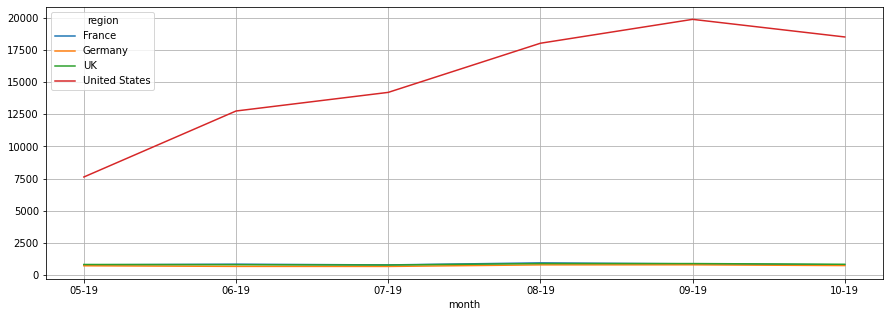

In [63]:
# построение графика помесячной динамики маркетинговых расходов по странам
profiles.pivot_table(
    index='month',
    columns='region',
    values='acquisition_cost',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)

plt.show()

Общая сумма расходов - $ 105.497.

Из них 86 процентов приходится на США - это больше, чем доля платных пользователей из этой страны. На Францию и Великобританию приходятся почти одинаковые рекламные бюджеты - по 5.1 тыс. Минимум расходов идёт на немецкий рынок - всего 4.4 тыс., или 4 процента.

Теперь проанализируем распространение расходов по рекламным каналам. Для этого модифицируем таблицу `channel`.

In [64]:
# добавление в таблицу channel сумм рекламных расходов
channel_cost = channel.merge(
    costs.groupby('channel').agg({'costs':'sum'}), on = 'channel', how = 'left'
)

# удаление столбца с долей платящих пользователей
channel_cost = channel_cost.drop(columns='Доля платящих в %')

# переименование столбцов и вывод на экран таблицы
channel_cost.rename(columns={'user_id_x': 'Количество пользователей', 'costs': 'Маркетинговые расходы'})

# вар.2 costs.pivot_table(index='channel', values='costs', aggfunc='sum')

,Количество пользователей,Маркетинговые расходы
channel,,
organic,56439,NaN
FaceBoom,29144,32445.60
TipTop,19561,54751.30
OppleCreativeMedia,8605,2151.25
LeapBob,8553,1797.60
WahooNetBanner,8553,5151.00
RocketSuperAds,4448,1833.00
MediaTornado,4364,954.48
YRabbit,4312,944.22


Как мы видим, наибольшие расходы приходятся на канал `TipTop` - более 54 тыс., или 52%.

На самый крупный по числу привлечённых пользователей канал `FaceBoom` израсходовано 32.4 тыс. Из остальных каналов только на `WahooNetBanner` приходится сумма более 5 тыс., расходы на остальные меньше 4 тыс.

Посмотрим на динамику изменения маркетинговых расходов по каждому источнику привлечения.

## Визуализация изменения маркетинговых расходов во времени по каждому источнику

Для начала добавим в таблицу `costs` колонки с номером месяца и недели.

In [65]:
# добавим в таблицу costs колонки с номером месяца и недели
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

Теперь можем сделать визуализацию помесячной и понедельной динамики расходов.

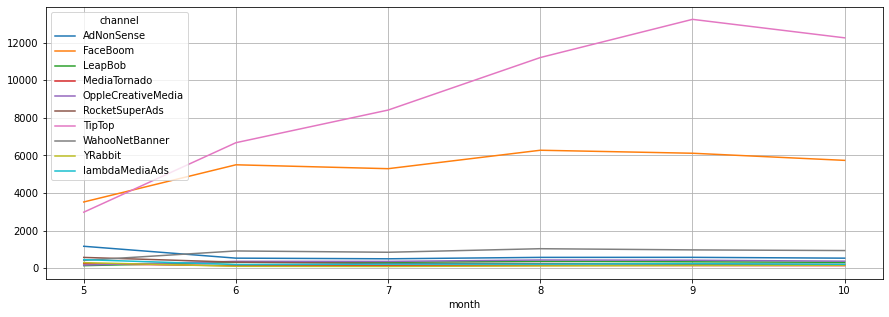

In [66]:
# построение графика помесячной динамики маркетинговых расходов
costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)

plt.show()

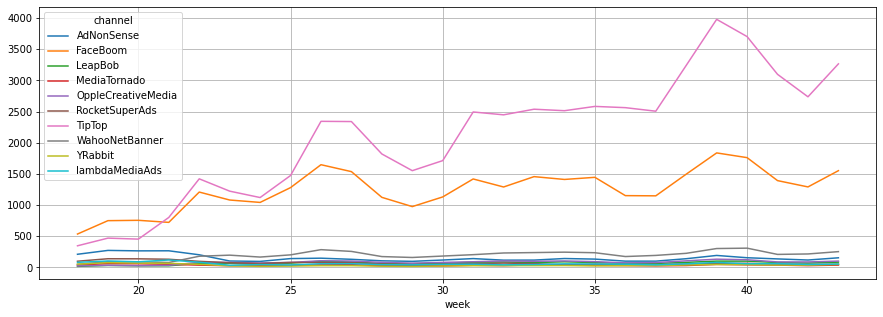

In [67]:
# построение графика понедельной динамики маркетинговых расходов
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True)

plt.show()

Итак, в результате почти непрерывного роста расходы на канал `TipTop` с мая по сентябрь выросли в три раза (а в разрезе недель - в 8 раз!). Даже после снижения в октябре они остались на уровне выше 12 тыс. в месяц, что превышает расходы на все другие каналы привлечения. Более того, в конце октября снова наметилась тенденция к росту расходов на `TipTop`. Следует внимательно изучить окупаемость этого канала.

На втором месте канал `FaceBoom`. Расходы на продвижение в нём выросли в два раза (в разрезе недель), однако стабильны и большую часть времени находятся в интервале (1.000 - 2.000 тыс. в мес.). Этот канала также требует особого внимания при анализе.

Остальные каналы практически не отличимы друг от друга. Можно отметить сокращение расходов на `AdNonSense`, который поначалу был в тройке лидеров, но уже в июне уступил эту позицию каналу `WahooNetBanner	`.

Мы определили валовые расходы на маркетинг и различные каналы продвижения, а также их динамику.

Найдём теперь стоимость привлечения одного пользователя (САС).

## Стоимость привлечения одного пользователя (САС) из каждого источника

Посчитаем среднюю стоимость привлечения одного пользователя (CAC) из каждого источника, а затем сравним их со средней CAC по всем каналам привлечения.

In [68]:
# расчёт CAC по каждому каналу привлечения с помощью таблицы profiles, сортировка результата по убыванию
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean').sort_values(by='acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Проверим полученные результаты с помощью таблицы `channel_cost`.

In [69]:
# расчёт CAC по каждому каналу привлечения с помощью таблицы channel_cost
channel_cost['mean'] = channel_cost['costs'] / channel_cost['user_id_x']
print(channel_cost)

                    user_id_x     costs      mean
channel                                          
organic                 56439       NaN       NaN
FaceBoom                29144  32445.60  1.113286
TipTop                  19561  54751.30  2.799003
OppleCreativeMedia       8605   2151.25  0.250000
LeapBob                  8553   1797.60  0.210172
WahooNetBanner           8553   5151.00  0.602245
RocketSuperAds           4448   1833.00  0.412095
MediaTornado             4364    954.48  0.218717
YRabbit                  4312    944.22  0.218975
AdNonSense               3880   3911.25  1.008054
lambdaMediaAds           2149   1557.60  0.724802


Итак, расчёт САС верный. Посчитаем среднюю САС по всем каналам.

In [70]:
mean_CAC = total_cost / channel_cost['user_id_x'].sum()
print(mean_CAC)

0.703277825182657


Итак, самыми дорогими каналами с точки зрения стоимости привлечения пользователей являются `TipTop`, `FaceBoom`, `AdNonSense`, `lambdaMediaAds`. При этом первые два канала - лидеры по количеству привлечений. Окупаются ли повышенные расходы на эти каналы? 

## Общий вывод

Общие расходы на рекламу составили $ 105 497.

При этом их распределение крайне неравномерно:

* 52 процента приходится на канал `TipTop`, при этом его САС в 4 раза превышает средний показатель. Расходы на канал достигли максимума в сентябре, и в конце октября снова стали расти.
    
* 31 процент расходов приходится на канал `FaceBoom`, однако его САС лишь в 1.5 раза выше среднего. Валовые расходы на канал стабильны и с августа в два раза уступают расходам на `TipTop`.
    
* расходы на остальные каналы оказывают незначительное влияние на общий показатель и не имеют никаких ярко выраженных тенденций. Можно отметить только третье место по суммарным расходам у канала `WahooNetBanner`. Выше среднего САС у канала `AdNonSense`.

# Оценка окупаемости рекламы

## Общая окупаемость рекламы. Графики LTV, ROI, а также динамики LTV, CAC и ROI.

Для начала установим момент и горизонт анализа. Исходя из условий исследования, это 1 ноября 2019 года и 2 недели.

In [71]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Для оценки эффективности рекламных кампаний нужно исключить из `profiles` пользователей, пришедших из органического поиска.

In [72]:
# создание таблицы без органических пользователей и вывод на экран ее первых 10 строк
adv_profiles = profiles[profiles['channel'] != "organic"]
adv_profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,05-19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,07-19,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,08-19,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10-19,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,06-19,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,05-19,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,05-19,False,0.250435
12,69985732,2019-10-09 21:36:33,RocketSuperAds,Mac,United States,2019-10-09,10-19,False,0.251613
17,93828625,2019-07-24 05:56:22,LeapBob,iPhone,Germany,2019-07-24,07-19,False,0.204324
19,112595447,2019-08-04 06:39:43,TipTop,iPhone,United States,2019-08-04,08-19,False,3.000000


Всё работает.

Теперь оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

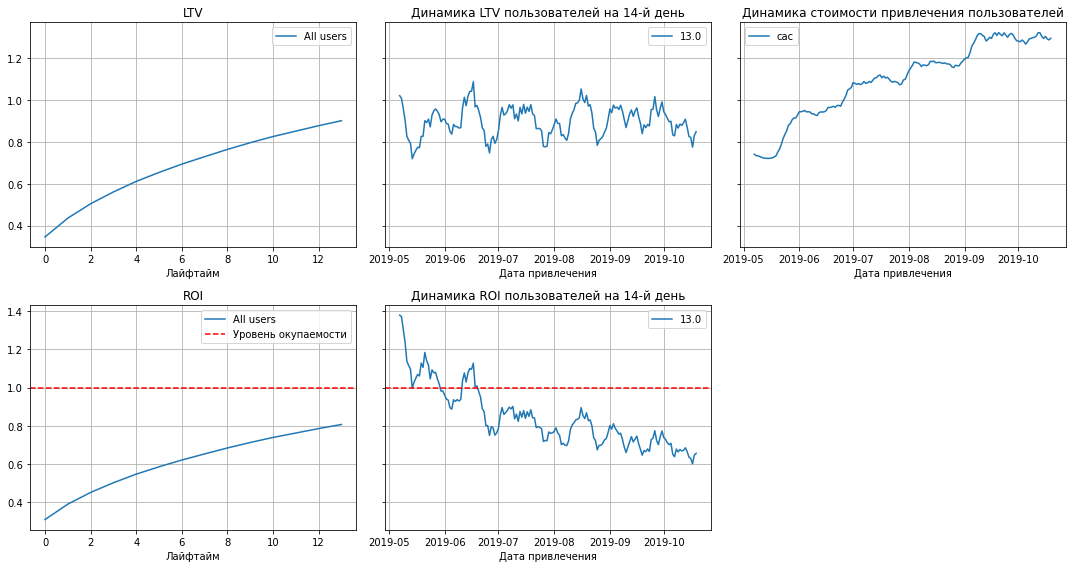

In [73]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Визуально LTV рассчитан верно.

Проверим, равна ли сумма размеров когорт общему количеству пользователей за анализуемый период.

In [74]:
# вывод на экран суммы размеров когорт и среднего CAC
roi_grouped

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


In [75]:
# создание среза данных, соответствующего анализируемому периоду
report = adv_profiles.query('datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()')
# вывод на экран количества пользователей за анализируемый период
print(report['user_id'].count())

88644


Проверка LTV пройдена. Проверим ещё САС.

Сумма рекламных расходов за период анализа должна равняться произведению среднего САС из таблицы ROI на сумму размеров когорт:

In [76]:
# определение общей суммы расходов на маркетинг за период анализа
t = costs.query('datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 19).date()')
print(int(t['costs'].sum()))

99085


In [77]:
# произведениe среднего САС из таблицы ROI на сумму размеров когорт
int(88644 * 1.117794)

99085

Проверка CAC также пройдена. Отметим, что средний САС в выборке вырос и составил 1.12.

Причина этого - в отсечении бесплатно привлечённых пользователей и в отсечении в силу установленного горизонта анализа данных за две последние недели октября, САС на которых был существенно выше среднего из-за роста маркетинговых расходов.

Поскольку LTV и САС проверены, ROI можно не проверять. Визуально он рассчитан верно.

Теперь вернёмся к графикам. Они показывают угрожающую ситуацию.

В конце периода ROI приблизился, но так и не пересёк линию окупаемости (даже без учёта себестоимости продукта) - значит, **реклама окупается только на 80%**. Более того, динамика ROI на 14-й день привлечения пользователя давно ушла в минус и имеет тенденцию только к ухудшению.

**Динамика LTV негативная** - средний показатель на 14-й день от даты привлечения пользователя снижается и в ближайшие месяцы ситуация с окупаемостью маркетинга будет ещё напряжённее, тем более учитывая рост в последние недели расходов на самый дорогой с точки зрения привлечения канал `TipTop`. Отметим очевидный сезонный характер LTV.

Наконец, показатель стоимости привлечения пользователей **САС демонстрирует устойчивый рост** и способен привести бизнес к краху. Средний САС составляет 1.12, а с середины сентября стабильно находится на уровне выше 1.3.

Чтобы не допустить краха, проанализируем конверсию и удержание, а также окупаемость рекламы с разбивкой по устройствам, регионам и рекламным каналам.

Для полной картины динамики каналов привлечения взглянем на динамику органической выдачи поисковых систем.

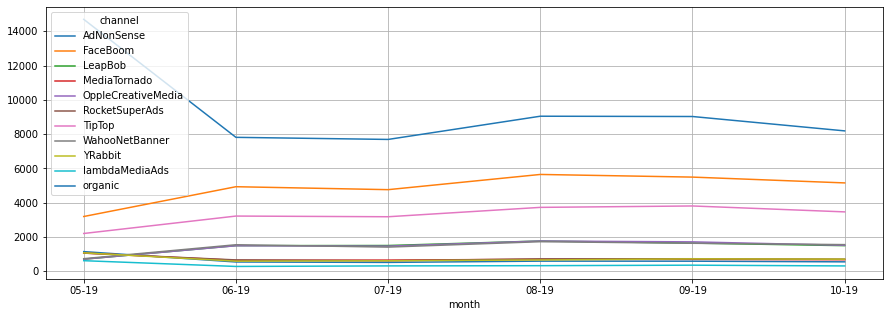

In [78]:
# построение графика помесячной динамики каналов привлечения пользователей с учетом органической выдачи
profiles.pivot_table(
    index='month',
    columns='channel',
    values='user_id',
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)

plt.show()

Органическая выдача сильно просела уже в июне - с 15 тыс. до 8 тыс. пользователей, - и так и не смогла восстановиться. Поиск причин этого падения и их устранение - **одна из точек роста**. Особенно учитывая тот факт, что ни один рекламный канал так и не смог приблизиться даже к минимальным показателям этого канала привлечения. Да, конверсия бесплатных пользователей всего 2%, но это бесплатная конверсия, что очень важно для компании в текущей ситуации.

**Другая точка роста** - рост конверсии среди бесплатно полученных пользователей. Ведь это самый массовый канал привлечения.

Обратимся к анализу конверсии и удержания.

## Конверсия и удержание пользователей, динамика их изменения

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

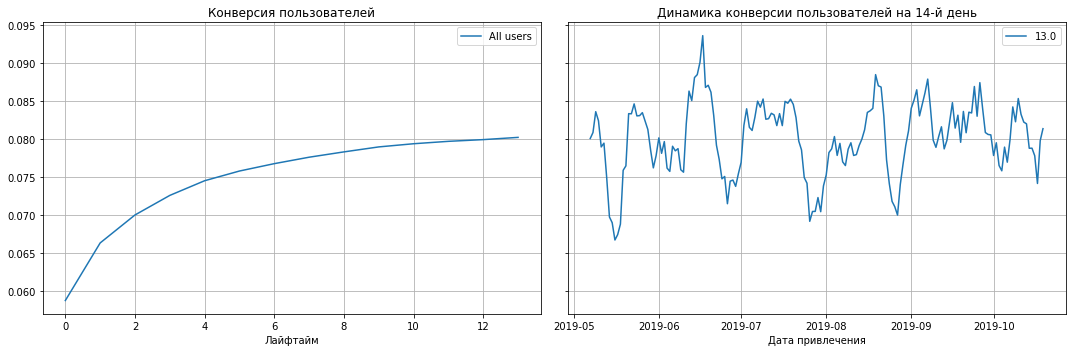

In [79]:
# смотрим конверсию по всем пользователям

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    adv_profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Мы видим, что конверсия на 14-ый день чуть выше 8%. Динамика показателя свидетельствует, что конверсия скачет от 7% до 9.4%. С течением времени амплитуда колебаний снижается.

**Необходимо выяснить, с чем связаны периодические подъёмы конверсии** для того, чтобы устранить причины снижения показателя. Это ещё одна потенциальная точка роста.

Важно также проанализировать окупаемость различных каналов привлечения и постараться сконцентрировать усилия на тех, которые имеют высокую конверсию и хорошую окупаемость.

In [80]:
# расчет конверсии за 14 дней
print(conversion_grouped)

           cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197  


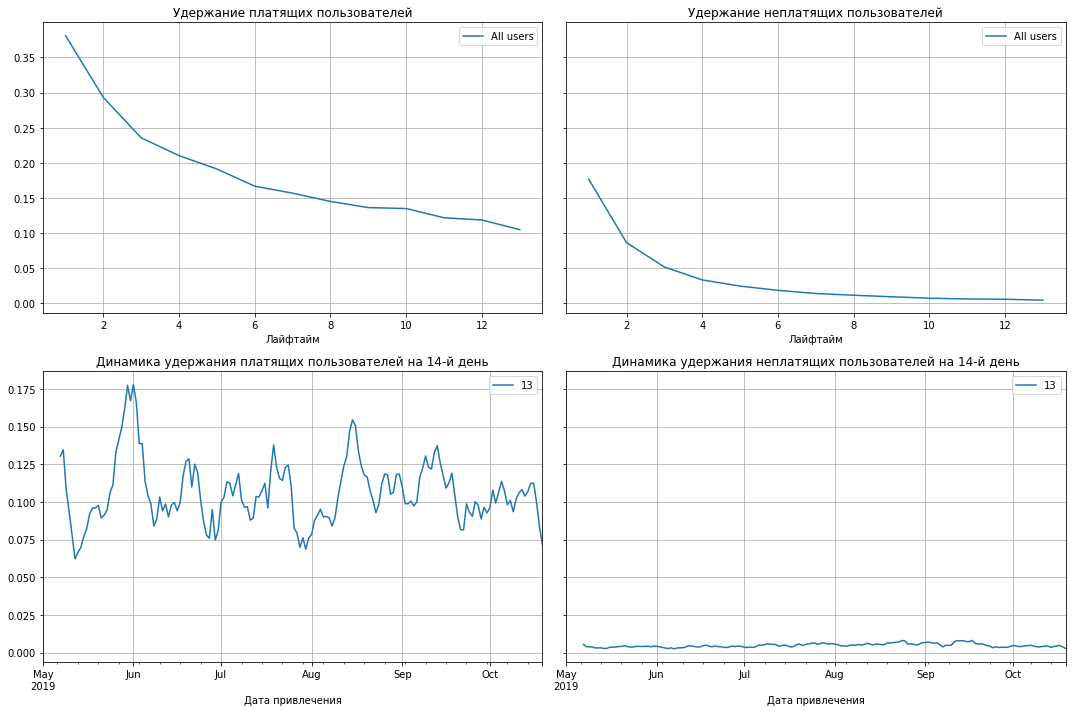

In [81]:
# посмотрим удержание платящих и неплатящих пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    adv_profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Итак, удержание платящих пользователей снижается с 38% до 10%. Особенно тревожен тот факт, что у привлечённых в октябре платящих пользователей коэффициент удержания падает на 14-й день уже до 7.5%.

**Необходимо срочно установить причину такого провала в октябре**, а также причины низкого коэффициента удержания платящих пользователей в самые первые дни лайфтайма. В первый день удержание платящих пользователей лишь в два раза превышает удержание неплатящих, на второй день - в четыре раза. Уже с четвёртого дня отрыв становится более заметен - пять и более раз.

На 10-й день неплатящие пользователи практически потеряны. **Возможно, это тоже точка роста.**

Проанализируем конверсию и удержание в зависимости от устройства, страны и рекламного канала.

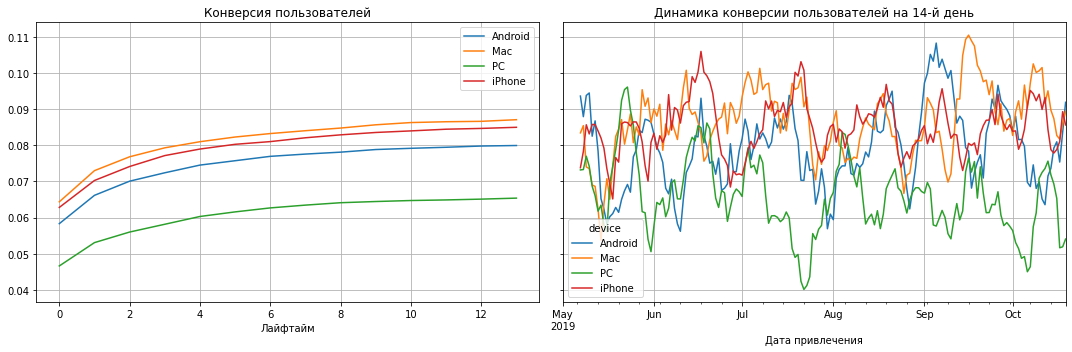

In [82]:
# смотрим конверсию по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

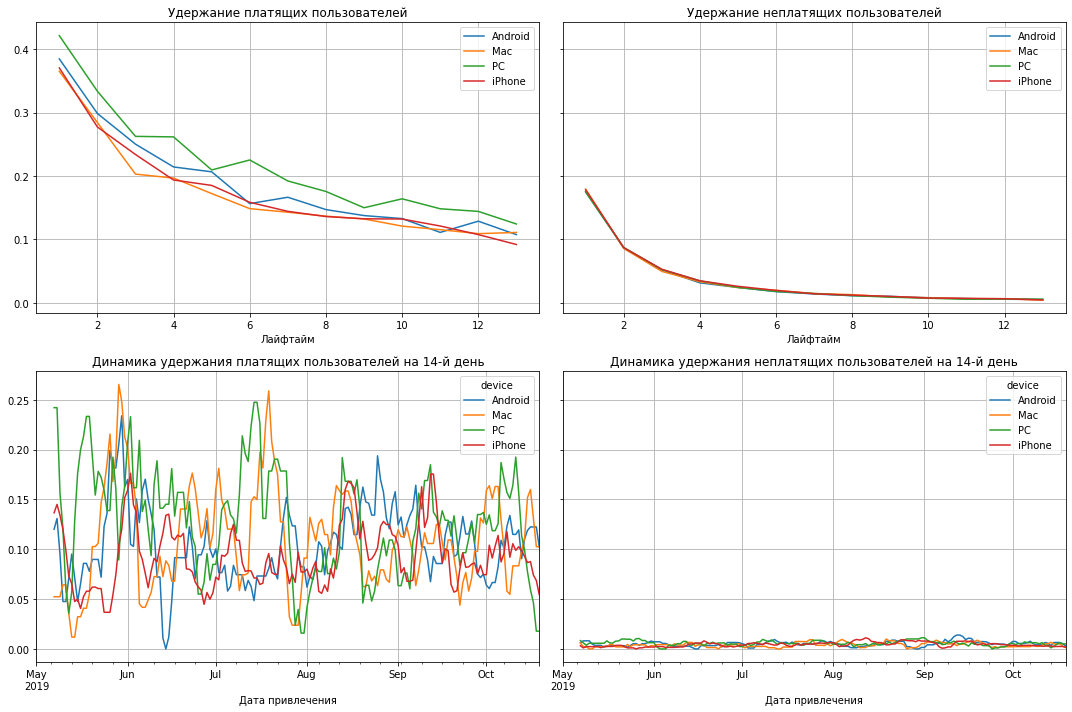

In [83]:
# смотрим удержание платящих и неплатящих пользователей по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    adv_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Максимальные показатели конверсии у пользователей на Mac и iPhone, минимальные - у PC. Однако последние более лояльные (у них выше удержание). Удержание неплатящих пользователей не зависит от типа устройства.

**В последние дни октября резкое снижение коэффициента удержания и конверсии** наблюдается у пользователей на всех устройствах, кроме Android. Возможно, это связано с обновлением приложения или массовым снижением лояльности.

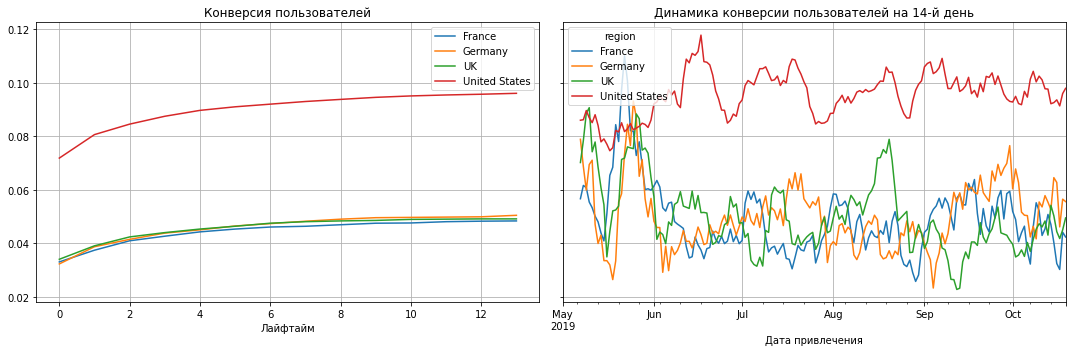

In [84]:
# смотрим конверсию по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

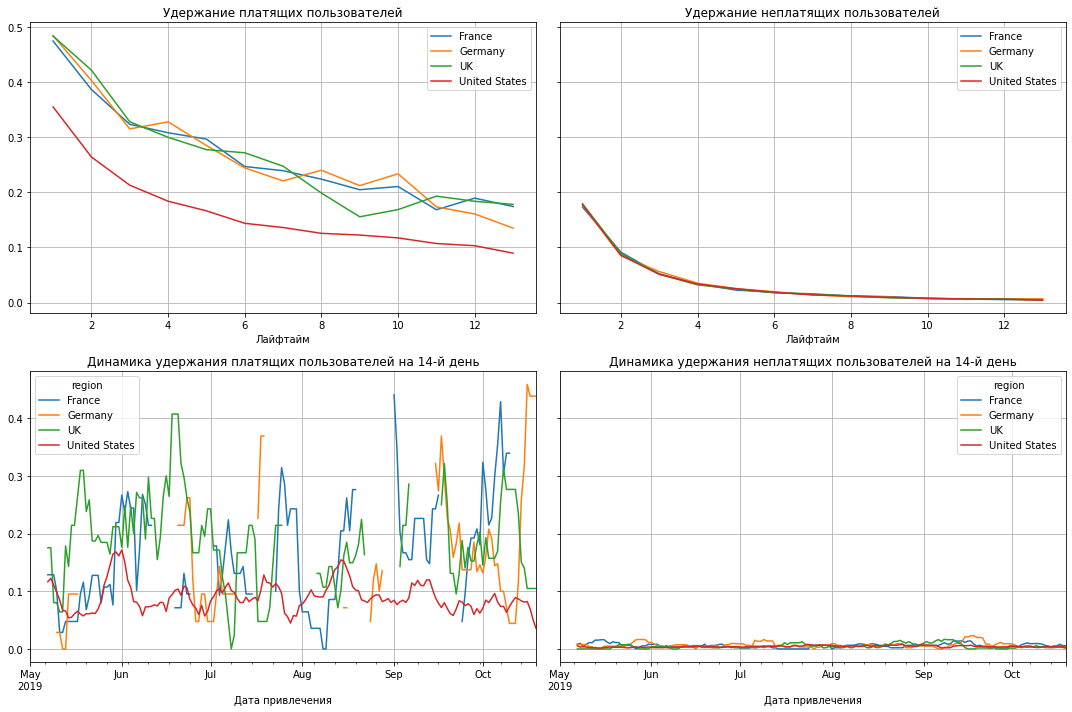

In [85]:
# смотрим удержание платящих и неплатящих пользователей по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    adv_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Мы выявили важный факт: у американских пользователей приложения наибольшая конверсия (почти 10% вместо 5% у остальных), но наименьшее удержание (менее 10%). А ведь это самый многочисленный сегмент. Получается, бюджет на привлечение американских пользователей тратится зря или неэффективно - они более активно регистрируются, оплачивают приложение, но затем теряют к нему интерес. **Возможно, стоит лучше настроить продукт под потребности американских пользователей**. А в текущей сложной ситуации маркетинговый бюджет на американский рынок надо заморозить, чтобы не тратить зря средства.

Очень большие скачки коэффициента удержания наблюдаются у европейских пользователей: в октябре они меняются в диапазоне от 47% до 5%. Анализ причин этого явления и недопущение просадок лояльности в европейской сегменте - **ещё одна точка роста**.

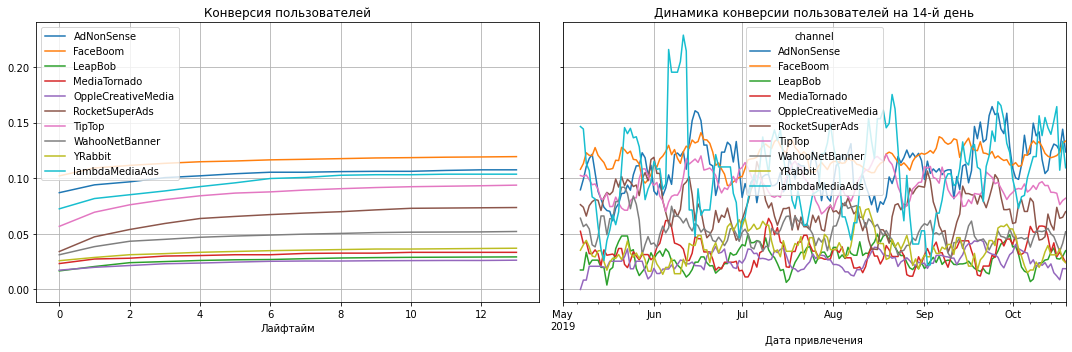

In [86]:
# смотрим конверсию по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

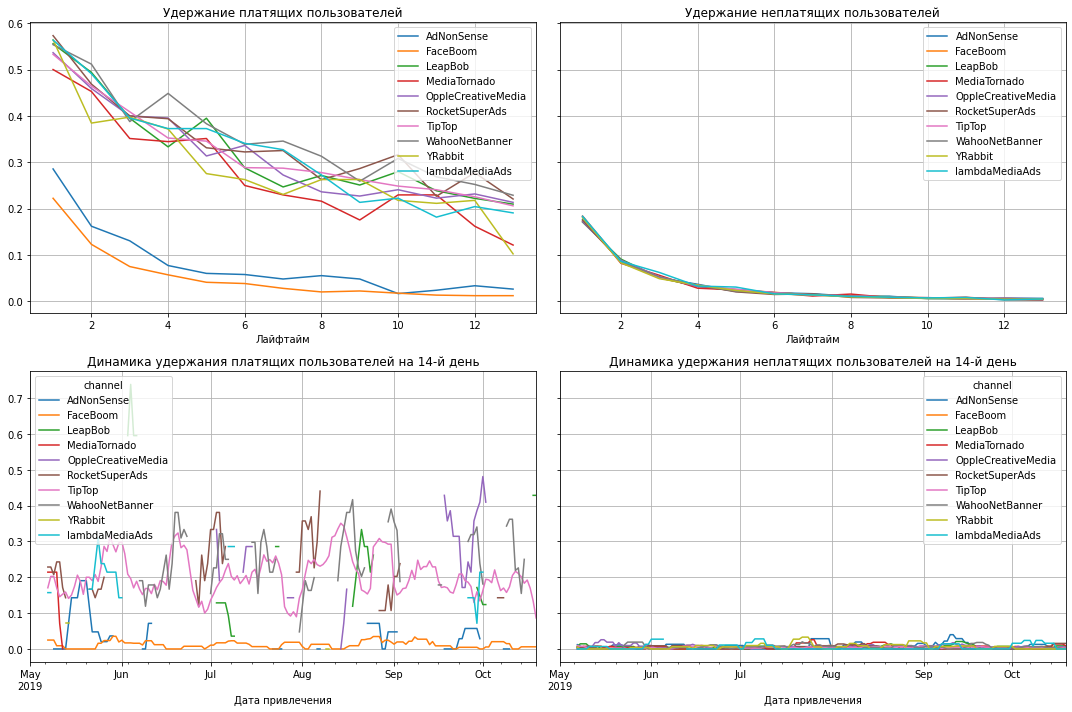

In [87]:
# смотрим удержание платящих и неплатящих пользователей по каналам привлечения
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    adv_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Ещё один важный факт: **коэффициент удержания у пользователей с каналов `FaceBoom` и `AdNonSense` практически нулевой**. При этом эти же каналы - в лидерах конверсии. Необходимо приостановить кампании на этих каналах и выяснить причины нулевой лояльности: или на этих каналах в целом находится нецелевая аудитория, или дело в настройках рекламных кампаний.

**Конверсия выше среднего наблюдается также у пользователей с каналов `LambdaMediaAds` и `TipTop` (около 10%)**. Выше среднего у них и показатель лояльности (удержания). Необходимо усиливать привлечение с этих каналов.

В середнячках по конверсии каналы `RocketSuperAds` и `WahooNetBanner`. Однако у пользователей с этих каналов - **максимальная лояльность (удержание)**. Привлечение с этих каналов также необходимо усилить.

Из остальных каналов отметим низкую конверсию и удержание у пользователей с `MediaTornado` и `YRabbit`. **Рекламные кампании на этих каналах следует приостановить** до выяснения и устранения причин такого положения дел.

Чтобы разобраться в причинах низкой эффективности маркетинга, пройдём также по всем доступным характеристикам пользователей — устройству, стране и каналу первого посещения.

## Окупаемость рекламы с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Да этого передадим параметру `dimensions` столбец `device`.

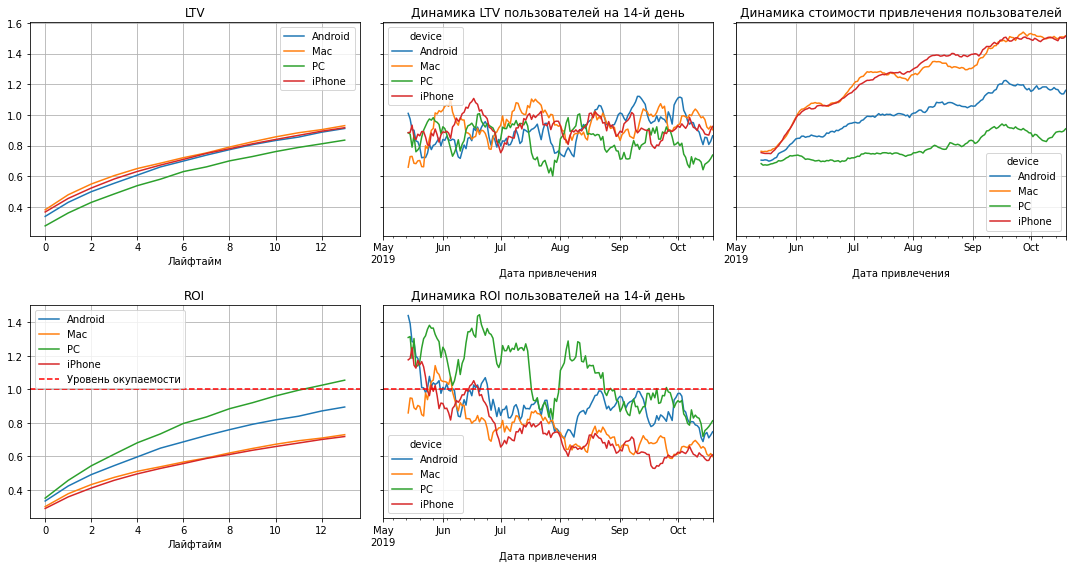

In [88]:
# окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Итак, LTV для всех устройств, за исключением PC, примерно одинаков. Однако обходятся пользователи на РС существенно дешевле. Также отличаются сравнительной дешевизной привлечения пользователи Android. Стоимость привлечения пользователей на Mac и iPhone продолжает непрерывно расти.

С конца сентября (а перед этим были провалы во второй половине июля и августа) у пользователей PC падает показатель LTV. Показатель у обладателей Android осенью повышается, обгоняя иногда пользователей на Mac и iPhone.

Закономерный итог примерно одинаковой величины LTV и значительного разрыва в стоимости привлечения мы видим на графике ROI: для обладателей Mac и iPhone он даже на 14-ый день оказывается все ещё ниже точки окупаемости. Лучше всего дела с окупаемостью обстоят у пользователей на РС.

Динамика ROI показывает ещё несколько любопытных фактов. Наиболее стабилен ROI у пользователей на Android. У привлечённых с середины августа пользователей на РС ROI снижается с 1.3 до 1.0 и далее до 0.8. Выяснить причину такого снижения и устранить её - **ещё одна точка роста.** Пользователи на Mac и iPhone имеют почти безнадёжно отрицательный ROI с устойчивой тенденцией его дальнейшего снижения.

**Таким образом, рекомендации отделу маркетинга в части устройств включают в себя следующие пункты:**
* прекратить "сжигать" бюджет на привлечение пользователей Mac и iPhone, т.к. они имеют отрицательный ROI. Необходимо вернуться к параметрам кампании по их привлечению, которые были в мае.
* усилить привлечение пользователей на PC. Увеличить охват и бюджет рекламы на этот сегменте.
* выяснить причины резкого ухудшения ROI пользователей на РС и их устранить.
* сохранить параметры рекламной кампании на пользователей Android. Для вывода их ROI в плюс постараться снизить стоимость их привлечения. После решения этой задачи увеличить маркетинговый бюджет на этот сегмент.

## Окупаемость рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

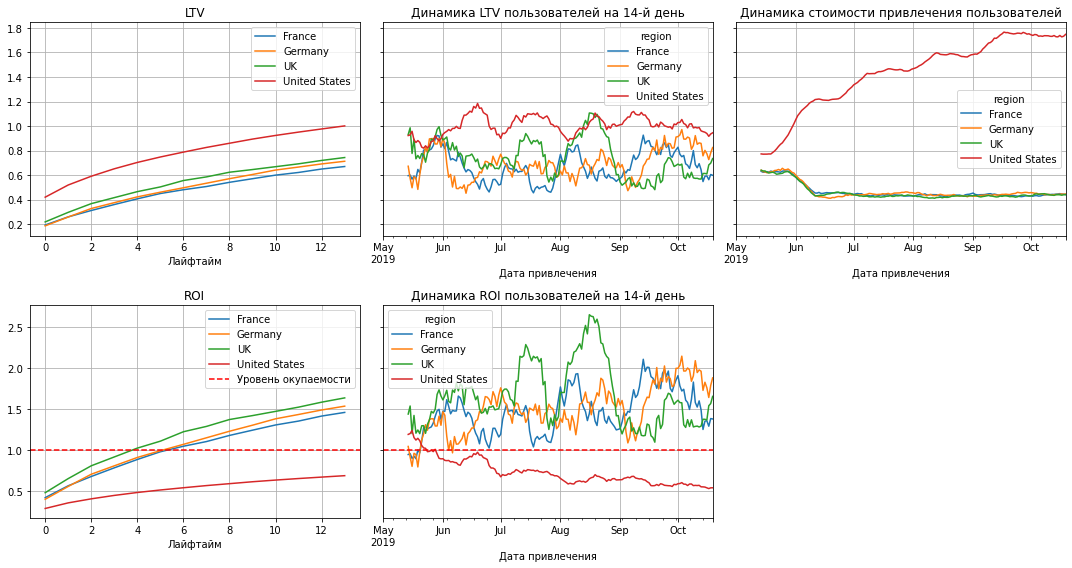

In [89]:
# окупаемость с разбивкой по регионам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**США**

Пользователи из этой страны имеют самый высокий и стабильный LTV. Однако показатель САС по этому региону выше европейского в 3-4.5 раза. В результате ROI отрицательный с конца мая. Учитывая долю региона в числе пользователей, именно это и вызвало проблемы компании. 

**Необходимо резко сократить стоимость привлечения пользователей**, вернув её на уровень июня, а затем сократив ещё ниже. При сохранении LTV на текущем уровне это должно вывести этот сегмент из отрицательной в слабо положительную зону.

**Германия**

Сегмент характеризуется относительно стабильным LTV, а начиная с середины сентября Германия становится лидером по LTV на европейском континенте. Стоимость привлечения довольно низкая. Это позволяет ROI оставаться стабильно высоким в диапазоне 1.5 - 2.0.

Необходимо выяснить причины роста LTV в середине сентября и не допускать снижения этого показателя ниже 0.7. Необходимо устранить причины низкого LTV летом. **Следует срочно увеличить рекламный бюджет на эту страну**, т.к. последние полтора месяца немецкий сегмент - лидер по ROI.

**Великобритания**

Сегмент характеризовался высоким LTV в июле и в августе, однако осенью он упал в 1.5 - 2 раза. Стоимость привлечения довольно низкая. Это позволяет ROI оставаться в положительной зоне, однако ситуация сильно ухудшилась осенью 2019 года. В итоге сегмент стал худшим на европейском континенте.

Необходимо выяснить причины осеннего падения LTV и до устранения причин сократить рекламный бюджет.
После устранения причин бюджет необходимо нарастить и сконцентрировать на этом регионе маркетинговые усилия, т.к. сегмент **имеет потенциально самый высокий ROI**.

**Франция**

Сегмент характеризуется относительно стабильным LTV, однако его величина немного ниже немецкого и английского. Стоимость привлечения довольно низкая. Осенью наблюдается рост показателя ROI до среднеевропейского уровня.

Необходимо выяснить причины роста LTV в начале августа и с середины сентября и устранить причины его снижения в середине октября.

Желательно поддерживать рекламный бюджет на текущем уровне, параллельно следя за поддержанием LTV. Регион не относится к ключевым.

**Таким образом**, ключевыми регионами для компании являются Германия и (в случае решения проблем) Великобритания.

Сложный регион - США (из-за высокого САС).

Неприоритетный регион - Франция. Рывка вперёд благодаря нему не получится, но он относится к стабильным середнякам, которые сейчас очень нужны.

## Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

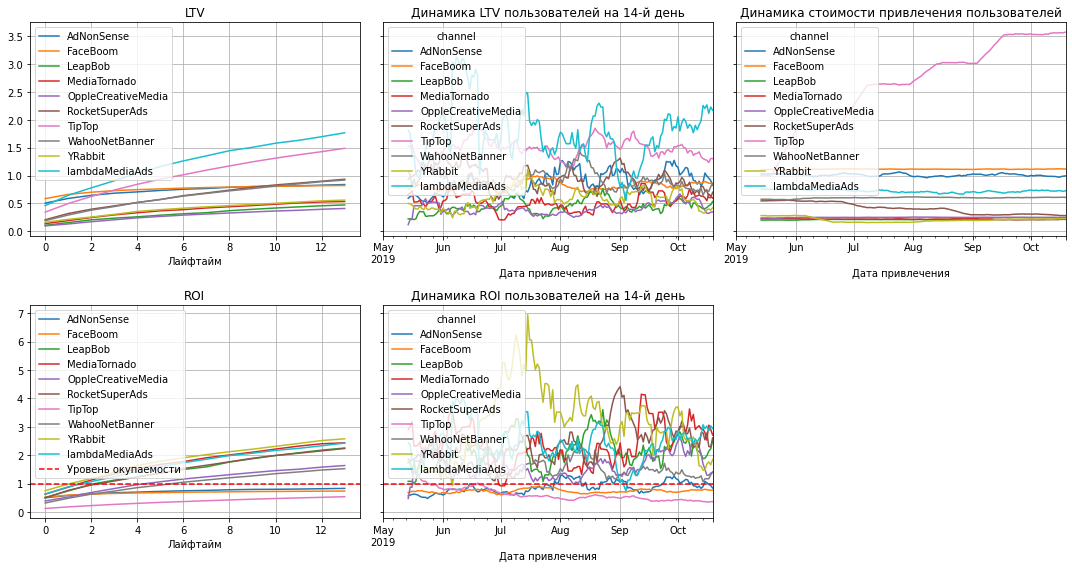

In [90]:
# окупаемость с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Анализ по каналам продвижения показывает следующее.

**AdNonSense**. Канал относится к середнячкам по LTV и САС. В итоге его ROI с августа месяца колеблется около уровня окупаемости. Необходимо повысить LTV и понизить стоимость привлечения. До тех пор - сократить маркетинговый бюджет.

**FaceBoom**. Похож на `AdNonSense`, только LTV ниже, а САС выше. ROI стабильно ниже окупаемости. Необходимо приостановить рекламные кампании, повысить LTV и понизить CAC.

**LeapBob**. Одни из самых низких LTV и CAC, как итог - вполне приличный ROI в среднем выше двух. Следует увеличить LTV.

**MediaTornado**. Также одни из самых низких LTV и CAC, как итог - приличный ROI в среднем около трёх. Эффективность маркетинга на канале особенно выросла с середины сентября. Следует увеличить LTV и маркетинговый бюджет.

**OppleCreativeMedia**. Одни из самых низких LTV и CAC, как итог - ROI около двух. Эффективность маркетинга резко упала в середине октября, нужно приостановить рекламу до выяснения причин этого. Следует также увеличить LTV.

**RocketSuperAds**. Средний LTV, CAC ниже среднего, как итог - один из лучших ROI, превысивший в конце августа отметку в 4 и не падавший осенью ниже 2. Следует увеличить LTV и маркетинговый бюджет.

**TipTop**. Канал - безоговорочный лидер: у него высокий LTV, но и сумасшедший САС. В итоге - минимальный ROI без шансов на окупаемость. Необходимо срочно приостановить рекламу и попытаться кратно сократить стоимость привлечения. Только после решения этой задачи можно будет возобновить рекламные кампании.

**WahooNetBanner**. Средний LTV, средний САС, как итог - канал находится в чуть положительной зоне по окупаемости, не поднимаясь выше 2 по ROI. Следует увеличить LTV.

**YRabbit**. Одно из самых низких LTV и самая низкая стоимость привлечения, как итог - очень приличный ROI, доходивший летом до 7. В октябре из-за снижения LTV ROI упал ниже 2. Следует срочно увеличить LTV.

**LambdaMediaAds**. Самое высокое LTV, средняя стоимость привлечения. Как результат - одно из самых высоких ROI. Следует выяснить причины четырёхкратного падения LTV во второй половине августа. Если удастся не допустить подобного в будущем, этот канал останется одним из самых эффективных по окупаемости рекламы (ROI может стабильно находиться в диапазоне 2 - 3). Необходимо контролировать LTV и увеличить маркетинговый бюджет.

В дополнение посмотрим на значения коэффициента удержания по каналам в динамике:

In [91]:
retention_grouped

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob             0.010433  0.007252  0.006616  0.005344  0.004835  
      MediaTornado        0.008460  0.007216  0.008957  0.004479  0.004976  
      OppleCreativeMedia  0.008461  0.008334  0.005556  0.007198  0.005683  
      RocketSuperAds      0.007661  0.007150  0.008427  0.003830  0.002809  
      TipTop        

## Общий вывод

**Реклама, направленная на привлечение пользователей, окупается лишь на 80%!** И это без учета себестоимости самого продукта - приложения Procrastinate Pro+.

Более того, с середины июня **ситуация каждый месяц только ухудшается** - окупаемость рекламных расходов падает всё ниже и ниже, достигнув уже 60%. При этом LTV держится стабильно в диапазоне 0.8 - 1.0. 

Негативный тренд задаётся резким и нарастающим ростом стоимости привлечения при параллельно упавшем с июня органическим траффиком. Средний САС составляет 1.12, а с середины сентября стабильно находится на уровне выше 1.3.

На 10-ый день происходит существенное падение удержания как платящих, так и не платящих пользователей. Вероятно, причины лежат в самом продукте. Их необходимо найти и устранить, повысив мотивацию и лояльность пользователей, подогреть их интерес.

**Выводы и рекомендации по странам**

У американских пользователей приложения (а их доля более 77%) наибольшая конверсия (почти 10% вместо 5% в остальных странах), но наименьшее удержание (менее 10%). Получается, бюджет на привлечение американских пользователей тратится зря - пользователи приходят и уходят. Возможно, стоит лучше настроить продукт под потребности американских пользователей. А до тех пор **маркетинговый бюджет на американский рынок свести к минимуму** (с 20 тыс. до 2-3 тыс. в мес.), чтобы не "палить" средства - с конца мая ROI по региону отрицательный (высокий и стабильный LTV не компенсирует галлопирующего роста САС).

Именно на американском рынке - ключ к нынешним проблемам компании. Необходимо вернуть стоимость привлечения пользователей на уровень июня, а затем сократить ещё ниже. Только там можно вывести этот рынок из отрицательной в слабо положительную зону.

Необходимо также выявить причины гигантских октябрьских скачков коэффициента удержания у европейских пользователей: с 5% до 47%.

До решения проблем с американским рынком ключевыми для компании должны стать Германия и Великобритания. Это снизит валовые темпы роста, но позволит повысить эффективность бизнеса.

Прежде всего следует **срочно увеличить рекламный бюджет на Германию**. С середины сентября эта страна - лидер по LTV на европейском континенте и лидер по ROI в общем зачёте.

Рекламный бюджет на Великобританию необходимо сократить до устранения причин осеннего падения LTV, т.к. в настоящий момент эта страна - худшая по ROI в Европе. После восстановления LTV следует нарастить рекламный бюджет и сконцентрировать на этом регионе маркетинговые усилия, т.к. он имеет потенциально самый высокий ROI.

Во Франции необходимо устранить причины падения LTV в середине октябре и поддерживать рекламный бюджет на текущем уровне.

**Выводы и рекомендации по устройствам**

У пользователей на Mac и iPhone - максимальные показатели конверсии. Однако обходятся они максимально дорого, причём САС по ним продолжает непрерывно расти, уводя ROI всё ниже в минус.

**Необходимо сократить бюджет на привлечение пользователей Mac и iPhone** (хотя на них и приходится 59% пользователей) и вернуться к майским параметрам кампании по их привлечению.

Параметры рекламной кампании на пользователей Android следует сохранить и постараться снизить их САС. **Маркетинговый бюджет на этот сегмент необходимо увеличить**, поскольку у пользователей Android осенью стал расти LTV, иногда даже превышая данный показатель для Mac и iPhone.

В настоящий момент необходимо дополнительно увеличить бюджет на сегмент Android, т.к. в последние дни октября наблюдается резкое снижение коэффициентов удержания и конверсии на всех устройствах, кроме Android. Вероятно, это связано с обновлением приложения.

Сегмент PC. Самый неоднозначный сегмент. У него минимальная конверсия, но самое высокое удержание (лояльность). Также у РС самый низкий LTV, но обходятся они дешевле всего. Как результат - у пользователей на РС лучше всего обстоят дела с окупаемостью, что в настоящий момент очень важно.

Краткосрочно, выправление ситуации с постоянными резкими провалами LTV в этом сегменте может позволить на время увеличить рекламный бюджет на него.

**Выводы и рекомендации по каналам продвижения**

**AdNonSense**. Канал относится к середнячкам по LTV и САС. В итоге его ROI с августа месяца колеблется около уровня окупаемости. Коэффициент удержания - почти нулевой. Необходимо повысить лояльность и LTV и снизить стоимость привлечения. До тех пор маркетинговый бюджет на стопе: или на этом канале в целом нецелевая аудитория, или дело в настройках рекламных кампаний.

**FaceBoom**. Похож на `AdNonSense`, только LTV ниже, а САС выше. ROI стабильно ниже окупаемости, а коэффициент удержания - почти нулевой. Необходимо также остановить рекламные кампании, повысить лояльность и LTV и понизить CAC.
На продвижение в канале потрачено более 32 тыс., а по эффективности это один из наихудших каналов. Добавим сюда расходы почти в 4 тыс. на продвижение в канале `AdNonSense`. Закономерно предположить, что канал - американский, и рассчитан на пользователей Mac и iPhone.

**LeapBob**. Одни из самых низких LTV и CAC, как итог - вполне приличный ROI в среднем выше двух. Следует увеличить LTV.

**MediaTornado**. Также одни из самых низких LTV и CAC, как итог - приличный ROI в среднем около трёх. Однако канал характеризуется низкой конверсией и удержанием. Возможно, здесь нецелевая аудитория, или неправильно настроенные рекламные кампании. Эффективность маркетинга на канале выросла с середины сентября. Следует увеличить LTV, конверсию и удержание и только после этого - маркетинговый бюджет.

**OppleCreativeMedia**. Одни из самых низких LTV и CAC, как итог - ROI около двух. Эффективность маркетинга резко упала в середине октября, нужно приостановить рекламу до выяснения причин этого. Следует также увеличить LTV.

**RocketSuperAds**. Один из перспективных каналов. Средний LTV, CAC ниже среднего, как итог - один из лучших ROI, превысивший в конце августа отметку в 4 и не падавший осенью ниже 2. Средний показатель по конверсии, зато один из лучших коэффициентов удержания. Следует увеличить LTV и маркетинговый бюджет.

**TipTop**. Канал - безоговорочный лидер: у него высокий LTV, но и сумасшедший САС. В итоге - минимальный ROI без шансов на окупаемость. Конверсия и удержание выше средних значений. Необходимо срочно приостановить рекламу и попытаться кратно сократить стоимость привлечения. Только после решения этой задачи можно будет возобновить рекламные кампании.

**WahooNetBanner**. Средний LTV, средний САС, как итог - канал находится в чуть положительной зоне по окупаемости, не поднимаясь выше 2 по ROI. Средний показатель по конверсии, зато лучший коэффициент удержания. Следует увеличить LTV.

**YRabbit**. Одно из самых низких LTV и самая низкая стоимость привлечения, как итог - очень приличный ROI, доходивший летом до 7. Однако канал характеризуется низкой конверсией и удержанием. Возможно, здесь нецелевая аудитория, или неправильно настроенные рекламные кампании. В октябре из-за снижения LTV ROI упал ниже 2. Следует срочно увеличить LTV.

**LambdaMediaAds**. Один из самых перспективных каналов. Самое высокое LTV, средняя стоимость привлечения. Как результат - одно из самых высоких ROI. На канале также выше среднего показатели конверсии и удержания. Следует выяснить причины четырёхкратного падения LTV во второй половине августа. Если удастся не допустить подобного в будущем, этот канал останется одним из самых эффективных по окупаемости рекламы (ROI может стабильно находиться в диапазоне 2 - 3). Необходимо контролировать LTV и увеличить маркетинговый бюджет.

# Итоги исследования. Выводы и рекомендации

Итак, наше исследование закончено. Потребовалась небольшая предобработка данных, но в целом полученные файлы отличались хорошим качеством. Исследование затронуло период с 1 мая по 31 октября 2019 года.

По состоянию на 1 ноября 2019 года приложением Procrastinate Pro+ пользуются 150 008 человек, из них платных пользователей - 8 881, или 5.9%.

Коэффициент удержания платящих пользователей на 14-й день составляет 12%, а неплатящих - 0.5%. При этом по каналам привлечения разброс значений удержания составляет для платящих клиентов от 23% (канал `WahooNetBanner`) до 1% (канал `FaceBoom`).

На 10-ый день происходит существенное падение удержания как платящих, так и не платящих пользователей. Возможно, причины лежат в самом продукте. Их необходимо найти и устранить, повысив мотивацию и лояльность пользователей, подогреть их интерес.

Общая сумма маркетинговых расходов за рассматриваемый период - $ 105.497.

Из них 86 процентов приходится на США - это больше, чем доля платных пользователей из этой страны. На Францию и Великобританию приходятся почти одинаковые рекламные бюджеты - по 5.1 тыс. Минимум расходов приходится на немецкий рынок - всего 4.4 тыс., или 4 процента.

Средняя стоимость платного привлечения одного пользователя - 1.12. При этом стоимость разнится от 2.8 (на канале `TipTop`) до 0.22 (на каналах `YRabbit` и `MediaTornado`). Среднее же LTV от одного платного пользователя - лишь 0.90. В результате окупаемость расходов на привлечение пользователей составляет в среднем за период 80%, а в конце октября упала до 60%!

Безоговорочный лидер как по общему количеству пользователей, так и по количеству и доле платящих пользователей - США. На них приходится 66.7% общего числа пользователей и 77.5% платящих пользователей. У них наибольшие конверсия, LTV, CAC, но наименьшие удержание и ROI.

Именно на американском рынке - ключ к нынешним проблемам компании. Необходимо вернуть стоимость привлечения пользователей на уровень июня, а затем сократить ещё ниже. Только там можно вывести этот рынок из отрицательной в слабо положительную зону.

До решения проблем с американским рынком ключевыми для компании должны стать Германия и Великобритания. Это снизит валовые темпы роста, но позволит повысить эффективность бизнеса. Прежде всего следует срочно увеличить рекламный бюджет на Германию. После восстановления LTV в Великобритании маркеинговые усилия следует сконцентрировать на этом регионе, т.к. он имеет потенциально самый высокий ROI.

Большинство пользователей предпочитает мобильные устройства - доля iPhone и Android составляет почти 60%.

Среди устройств на первом месте - iPhone. На них приходится 36% общего числа пользователей и 38% платящих пользователей. Вместе с Mac на поклонников продуктов Apple приходится 59% пользователей. Однако САС по ним продолжает непрерывно расти, уводя ROI всё ниже в минус. Поэтому необходимо срочно сократить бюджет на привлечение пользователей Mac и iPhone.

Пользователи Android почти не отличаются по конверсии от "яблочников", но стоимость их привлечения в разы меньше. Кроме того, осенью в этом сегменте начал расти LTV, а в последние дни октября наблюдается резкое снижение коэффициентов удержания и конверсии на всех устройствах, кроме Android (вероятно, это связано с обновлением приложения). По этой причине маркетинговый бюджет на пользователей Android необходимо увеличить.

Среди каналов привлечения на первом месте - органическая выдача поисковых систем. На неё приходится более 56 тыс. чел. (37 процентов общего числа пользователей). На втором месте `FaceBoom` - из него пришло 29 тыс. пользователей, третий лидер - канал `TipTop` с почти 20 тыс. Остальные каналы привлекли менее 9 тыс. пользователей каждый.

Тройка лидеров по количеству платящих пользователей та же, однако из 56 тыс. бесплатных пользователей покупки совершили только 1.2 тыс. из них. В результате этот канал на третьем месте после `FaceBoom` и `TipTop`.

В результате лидер по количеству привлечённых пользователей - органическая выдача поисковых систем - характеризуется конверсией всего в 2.1%. Самая высокая конверсия у канала `FaceBoom` - 12.2%, у каналов `AdNonSense` и `lambdaMediaAds` она также выше 10%. У канала `TipTop` конверсия 9.6%. Однако по эффективности привлечения и удержания каналы `FaceBoom` и `AdNonSense` - наихудшие, рекламу на них нужно срочно остановить. Также нужно срочно приостановить рекламу на канале `TipTop` до устранения выявленных проблем.

Наиболее перспективные каналы - `RocketSuperAds` и `LambdaMediaAds`.

Необходимо также повышать конверсию и трафик с органической выдачи поисковых систем. Несмотря на низкую конверсию, за счёт объёма трафика органические пользователи принесли компании доход в 46 627.

Более подробные выводы и рекомендации для маркетингового отдела - в пункте 6.6 Исследования.